##  BANK CUSTOMER CHURN MODELLING BY ANN .

### 1. Problem Statement:-
*  A bank is investigating a very high rate of customer leaving the bank. Here is a 10,000 records dataset to investigate and      predict which of the customers are more likely to leave the bank soon.

### 2. Dataset:-
* The Dataset is taken from the kaggle Dataset.
* https://www.kaggle.com/datasets/shubh0799/churn-modelling

### 3. Features:-

* This is a dataset for a bank which collects information about the customers
* **RowNumber**: is an irrelevent feature that we are going to get rid of it in the future
* **Customerid**: is the identification key of each customer
* **Surname**: is the surname of each customer
* **CreditScore**: is the credit score of each customer
* **Geography**: means the conutry which each customer lives in
* **Gender**: is the gender of each customer
* **Age**: is the age of each customer
* **Tenure**:means the number of the year(s) which customer in the bank
* **Balance**: means the amount of money that each customer has in their account
* **NumOfProducts**: the number of the product(s) which customer uses like Credict card, Master Card Etc,
* **HasCrCard**: means if the customer has the credit card, 1 means Yes and 0 means No
* **isActiveMember**: means if the customer is active or not which 1 means is a active customer
* **EstimatedSalary**: means the estimated salary of each customer # Target
* **Exited**: means if the customer exists the bank or not, 
* **1 means the customer left the Bank**.
* **0 means the customer is still part of the Bank**.


### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

### Load Dataset

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### EDA

C:\Users\GNULR\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

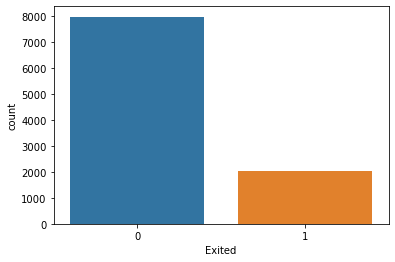

In [9]:
 
sns.countplot(df['Exited'])

- Around 20% of the Customer have churned and other 70% customers haven't Churned.
- 0 == Not Churned 
- 1 ==  Churned 

<AxesSubplot:xlabel='Gender', ylabel='count'>

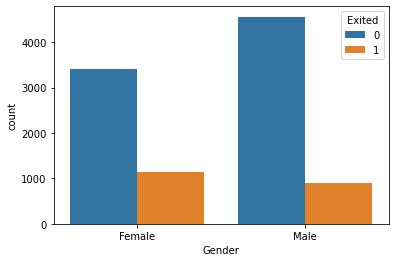

In [10]:
## Visualising the Categorical Variables 

sns.countplot(x='Gender',hue='Exited',data=df)

- The proportion of female customers churning is also greater than that of female customers.

<AxesSubplot:xlabel='Geography', ylabel='count'>

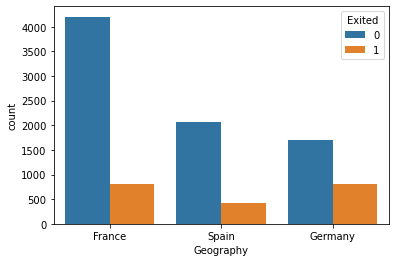

In [11]:
sns.countplot(x='Geography',hue='Exited',data=df)

- Majority of the customers are from france but most customers which churned are from germany maybe because of lack of resources as there are not many customers.

C:\Users\GNULR\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

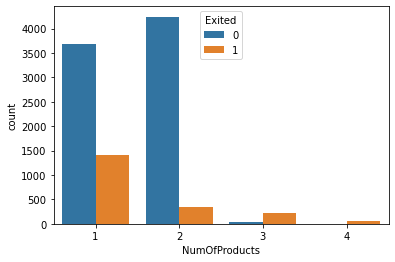

In [12]:
sns.countplot('NumOfProducts',hue='Exited',data=df)

- Most of the customers have 1 or 2 products and most customers which churned are having 1 products maybe they are not satisfied so they are churning.

C:\Users\GNULR\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

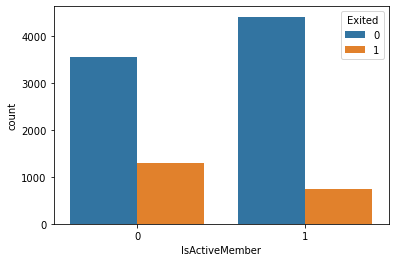

In [13]:
sns.countplot('IsActiveMember',hue='Exited',data=df)

- Unsurprisingly the inactive members have a greater churn and the overall proportion of inactive members is also very high.

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

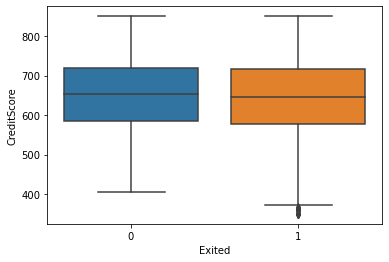

In [14]:
## Visulaising on Continous variables

sns.boxplot(x='Exited',y='CreditScore',data=df)

- There is no significant difference in credit score distribution between customers which are churned or not.

<AxesSubplot:xlabel='Exited', ylabel='Age'>

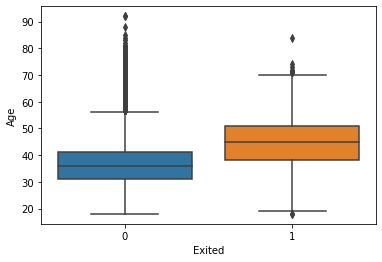

In [15]:
sns.boxplot(x='Exited',y='Age',data=df)

- The older customers are churning more than younger ones.

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

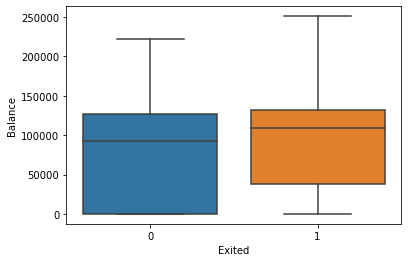

In [16]:
sns.boxplot(x='Exited',y='Balance',data=df)

- Bank is loosing customers with significant bank balance.

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

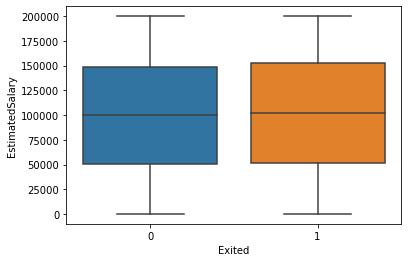

In [17]:
sns.boxplot(x='Exited',y='EstimatedSalary',data=df)

- Estimated Salary does not have a significant on the likelihood to churn.

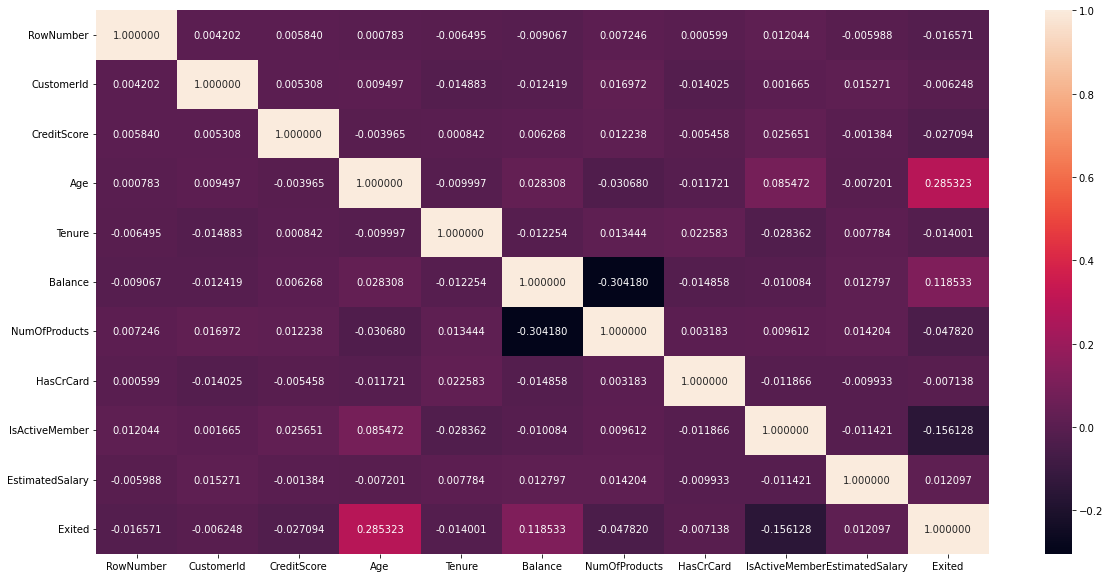

In [18]:
## Heatmap
plt.figure(figsize=(20,10))

corr=df.corr()
sns.heatmap(corr,annot=True,fmt="2f")

plt.show()

- We can say that there is no multicolinearity present in data

In [19]:
## Dropping Useless Columns.

df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Feature Engineering 

In [21]:
## Encoding categorical variables

df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [23]:
## Creating Independent and Dependent Variables.
## X == Independent variables.
## y == Dependent Varobales.

X=df.drop('Exited',axis=1)
y=df['Exited']

### Splitting the data into train and test set.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
### Intalising the Standardscaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [28]:
X_train

array([[ 0.16958176,  1.51919821,  1.09168714, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.3131264 , -0.91601335, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.89294542,  1.09168714, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.89294542, -0.91601335, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521,  1.51919821,  1.09168714, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.3131264 ,  1.09168714, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [29]:
X_test

array([[-0.55204276,  0.3131264 ,  1.09168714, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297, -0.89294542,  1.09168714, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  1.51919821,  1.09168714, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227,  1.51919821, -0.91601335, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991,  0.3131264 , -0.91601335, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688,  0.3131264 , -0.91601335, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [30]:
X_train.shape

(8000, 10)

### Steps for Building a Artifical Neural Network (ANN).

* **Building model**: Defining Architecture
* **Compile**: Giving metadata(like loss, optimizer)
* **Fit the model**

### 1. Building ANN 

In [31]:
from tensorflow.keras.models import Sequential

In [32]:
### Intalising the ANN

model = Sequential()

In [33]:
from tensorflow.keras.layers import Dense

In [34]:
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU

In [35]:
from tensorflow.keras.layers import Dropout

In [36]:
### adding the first input layer 

model.add(Dense(units=10,activation='relu'))

In [37]:
### adding the first hidden layer.

model.add(Dense(units=6,activation='relu'))

In [38]:
### adding the output layer.

model.add(Dense(1,activation='sigmoid'))

### 2. Compiling the model.

In [39]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### 3. Fitting the model to the training set

In [40]:
model_history=model.fit(X_train,y_train,batch_size=10,validation_split=0.3,epochs=40)

Epoch 1/40
560/560 [==============================] - 4s 4ms/step - loss: 0.4876 - accuracy: 0.7904 - val_loss: 0.4673 - val_accuracy: 0.7950
Epoch 2/40
560/560 [==============================] - 2s 4ms/step - loss: 0.4316 - accuracy: 0.8112 - val_loss: 0.4438 - val_accuracy: 0.8083
Epoch 3/40
560/560 [==============================] - 3s 5ms/step - loss: 0.4106 - accuracy: 0.8216 - val_loss: 0.4283 - val_accuracy: 0.8108
Epoch 4/40
560/560 [==============================] - 2s 3ms/step - loss: 0.3943 - accuracy: 0.8338 - val_loss: 0.4145 - val_accuracy: 0.8183
Epoch 5/40
560/560 [==============================] - 2s 4ms/step - loss: 0.3799 - accuracy: 0.8388 - val_loss: 0.4035 - val_accuracy: 0.8292
Epoch 6/40
560/560 [==============================] - 2s 4ms/step - loss: 0.3688 - accuracy: 0.8454 - val_loss: 0.3961 - val_accuracy: 0.8333
Epoch 7/40
560/560 [==============================] - 2s 4ms/step - loss: 0.3599 - accuracy: 0.8505 - val_loss: 0.3844 - val_accuracy: 0.8396
Epoch 

### Visualizing history for loss

In [41]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

###  Making the Predictions and Evaluating the model

In [42]:
y_pred=model.predict(X_test)
y_pred=(y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [43]:
### Confusion matrix

from sklearn.metrics import confusion_matrix

In [44]:
cm=confusion_matrix(y_test,y_pred)

In [45]:
cm

array([[1520,   75],
       [ 203,  202]], dtype=int64)

In [46]:
## Calculate the accuracy 

from sklearn.metrics import accuracy_score

In [47]:
acc=accuracy_score(y_test,y_pred)

In [48]:
acc

0.861

In [49]:
## get the weights 

model.get_weights()

[array([[-0.1108901 , -0.4901817 , -0.05143798, -0.08308303, -0.02592354,
         -0.11970869, -0.00530811, -0.02633599,  0.08466771, -0.11704552],
        [-0.06361805,  0.17283611,  0.11058041, -1.0693641 , -0.24050547,
         -0.22690481, -0.38189173, -0.11487036,  0.80383104, -0.11242108],
        [-0.16008373, -0.24810548,  0.03245667, -0.41417128, -0.04442379,
          0.04385802, -0.15565526, -0.05714159, -0.5591128 , -0.10435422],
        [ 1.085987  , -0.34369206,  0.27825695, -0.13064286, -0.6333473 ,
          0.5915664 ,  0.26702842, -0.19609003, -0.02370752,  0.4620803 ],
        [ 0.05358262,  0.33705083,  0.1425092 ,  0.36986053, -0.32539454,
          0.33302507, -0.13841349,  0.02163083,  0.31370908,  0.13792987],
        [-0.2695783 ,  0.44695553,  0.35926497, -0.08036791, -0.0905529 ,
         -0.00133111, -0.40279576, -0.20253202, -0.38082337, -0.26362413],
        [ 0.4518215 ,  0.11198591,  1.0456905 , -0.29675788, -0.05117488,
          0.13222212,  0.8070441

In [50]:
model.layers[1].get_weights()

[array([[-0.61227864,  0.91013616,  0.04506379, -0.17065986, -0.5147298 ,
         -1.0560409 ],
        [ 0.43977267, -0.13091324,  0.04632825, -0.17390203, -0.5073341 ,
          0.4395644 ],
        [-0.21702716, -1.042783  , -0.50767726,  1.2056209 ,  0.07513559,
          0.37930897],
        [ 0.63539463, -0.20697246,  0.632505  ,  0.28581148,  0.66843015,
         -0.8353451 ],
        [ 0.04243052, -0.17935856,  0.56631535,  0.2795549 ,  0.32560647,
         -0.39369506],
        [-0.11670809,  0.19506638,  0.21011789, -0.28284875, -0.24065351,
          0.07841576],
        [-0.02092632, -0.33661255,  0.15819268,  0.4881391 , -0.13815673,
         -0.21828371],
        [ 0.5809886 ,  0.48507583,  0.38641205, -0.09077599,  0.4125655 ,
         -0.09387553],
        [ 0.37071025,  0.3684213 ,  0.30039066,  0.26224336, -0.12987049,
          0.45917737],
        [-0.31149   , -0.27857476, -0.29883495,  0.8563641 , -0.29563868,
         -0.2419004 ]], dtype=float32),
 array([ 0.60

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Visualizing Training Loss

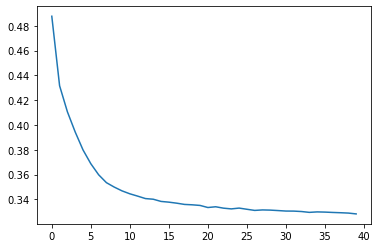

In [53]:
plt.plot(model_history.history['loss'])

### Visualizing Training Accuracy

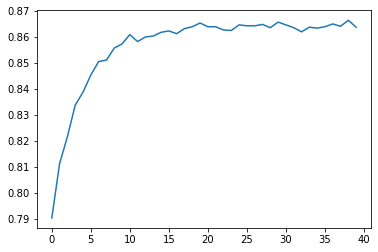

In [54]:
plt.plot(model_history.history['accuracy'])

### Making the predictions and evaluating the model

In [55]:
print(model.predict(sc.transform([[0,632,1,40,3,193354.86,2,1,0,149188.41,]])) > 0.5)

1/1 [==============================] - 0s 52ms/step
[[False]]


C:\Users\GNULR\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Therefore, our ANN model predicts that this customer stays in the bank.

### Conclusions:

* Total params: 183
* Trainable params: 183
* No of Epochs : 40
* training_data_set_accuracy = 0.8637
* Valdation_data_set_accuracy=0.8556

* **The older customers are churning more than younger ones**.
* **Bank is loosing customers with significant Bank Balance**.
* **The ANN model predicted with 0.8637 Accuracy**.